# ALL IMPORTS


In [98]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Temperature of a rod
Let 𝑓(𝑡, 𝑥) be a function of time and space,solution to the heat equation with initial value .\
$$\frac{\partial f}{\partial t}=\frac{1}{2}\Delta f $$\
and \
$$𝑓(0, 𝑥) = 𝑔(𝑥)$$\
then f(t,x) has the following representation :
$$𝑓(𝑡, 𝑥) = E[𝑔(𝐵_t)|𝐵_0 = 𝑥]$$

f also has the following representation :\ 
$$𝑓(𝑡, 𝑥) = ∫𝑔(𝑦)𝑝𝑡(𝑥, 𝑦) d𝑦.$$
with$$ 𝑝𝑠(𝑥, 𝑦) = \frac{e^{\frac{-(y-x)^2}{2s}}}{\sqrt{2𝜋𝑠}}, 𝑠 > 0, 𝑥, 𝑦 ∈ ℝ$$

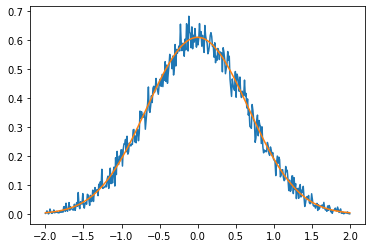

In [99]:
#we here take the case g(x)=1-|x| if |x|=<1 and 0 elsewhere and t1=0.25
pi=np.pi
step_size=0.01
d = 100
T = 0.25
n=int((T/step_size))
f_t1_x=[]
h_t1_x=[]
X=np.linspace(-2.,2.,400)
Y=np.linspace(-10.,10.,2000)
dY=Y[1]-Y[0]
for x in X:
    #We create 100 paths of  brownian motion with discretization step 0.01 and up to time 0.25 starting at x
    times = np.linspace(0., T, n)
    dt = times[1] - times[0]
    # Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
    dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
    B0 = x*np.ones(shape=(1, d))
    B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
    # we create g(Bt)
    gB= (1-np.abs(B))*((B<=1) & (-1<=B)) 
    # and here we calculate the expectation of g(Bt) for every tj=0.01*j j goes from 0 to 25 with B starting at x 
    E_gb=np.sum(gB,axis=1) / d 
    f_t1_x.append(E_gb[n-1])
    # we will try to validate this representation using another way to calculate f
    pt_x_y=dY*np.exp(-np.power(Y-x,2)/(2*T))/((2*T*pi)**(0.5))
    g_y=(1-np.abs(Y))*((Y<=1) & (-1<=Y))

    I_g_p=np.sum(g_y*pt_x_y,axis=0) #Reinman integral of g(y)*pt(x,y) dy at time t=T
    h_t1_x.append(I_g_p)
    
# plotting f on 
plt.plot(X,f_t1_x)
plt.plot(X,h_t1_x)




# A Strange Martingale
We will be sampling this process which turns out to be a martingale $ 𝑀_t = \frac{1}{\sqrt{1-t}} \exp{\frac{{B_t}^{2}}{2(1-t)}} $ , for 0 ≤ 𝑡 < 1, where Brownian motion (𝐵𝑡
, 𝑡 ≤ 1). 

In [100]:
average_max_M=[]
d = 100
T = 0.99
x=0.
for step_size in [0.01,0.001,0.0001] :
    n=int(T/step_size)
    #We create 100 paths of  brownian motion with discretization step 0.01 and up to time 0.25 starting at x
    times = np.linspace(0., T, n)
    times=times.reshape((n,1))
    dt = times[1] - times[0]
    # Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
    dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
    B0 = x*np.ones(shape=(1, d))
    B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
    # we compute the strange martingale
    M=np.power(1-times,-0.5)*np.exp(np.power(B,2)/(2*(1-times)))
    #We will now try to compute the average of max(M)
    maxM=np.max(M,axis=0,keepdims=True)
    average_max_M.append(float(np.sum(maxM))/d)
print(average_max_M)

[3.48026267538695e+172, 2.879626536921524e+150, 2.981627784448867e+142]


# Smoluchowski’s equation
Consider the diffusion (𝑋𝑡, 𝑡 ≥ 0) with SDE
d𝑋𝑡 = d𝐵𝑡 − 2sgn(𝑋𝑡) d𝑡, 𝑋0 = 1,
where sgn(𝑋𝑡) = 1 if 𝑋𝑡 ≥ 0 and sgn(𝑋𝑡) = −1 if 𝑋𝑡 < 0.

we will plot X , then compare the distribution of X5 tothe invariant distribution
𝑓(𝑥) = 2𝑒−4|𝑥|, 𝑥 ∈ ℝ.

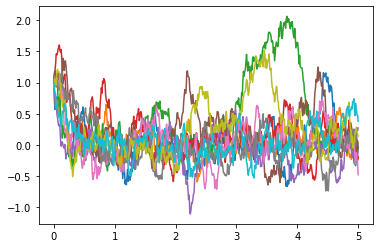

In [101]:
step_size=0.01
d = 10000
T = 5.
x=0.
n=int(T/step_size)
#We create 100 paths of  brownian motion with discretization step 0.01 and up to time 0.25 starting at x
times = np.linspace(0., T, n)
times=times.reshape((n,1))
dt = times[1] - times[0]
# Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
B0 = x*np.ones(shape=(1, d))
B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
#Computing the SDE
X=np.ones((n,d))
for i in range(1,n):
    for j in range(d):
        if(X[i-1,j]>=0):
            X[i,j]=(X[i-1,j]-2*dt+dB[i-1,j])
        else:
           X[i,j]=(X[i-1,j]+2*dt+dB[i-1,j])
#plotting
for i in range(d):
    plt.plot(times,X[:,i])
        

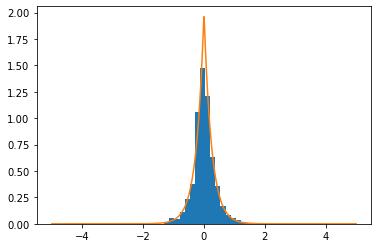

In [120]:
step_size=0.01
d = 1000
T = 5.
x=0.
n=int(T/step_size)
#We create 100 paths of  brownian motion with discretization step 0.01 and up to time 0.25 starting at x
times = np.linspace(0., T, n)
dt = times[1] - times[0]
# Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
B0 = x*np.ones(shape=(1, d))
B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
#Computing the SDE
X=np.ones((n,d))
for i in range(1,n):
    for j in range(d):
        if(X[i-1,j]>=0):
            X[i,j]=(X[i-1,j]-2*dt+dB[i-1,j])
        else:
           X[i,j]=(X[i-1,j]+2*dt+dB[i-1,j])
#Computing the f function
x=np.linspace(-5,5,1000)
f=2*np.exp(-4*np.abs(x))
#Plotting
plt.hist(X[n-1,:],density=True,bins=20)
plt.plot(x,f)
plt.show()

# Invariant distribution of the CIR model
Consider the CIR model with SDE d𝑋𝑡 = (1 − 𝑋𝑡) d𝑡 + √𝑋𝑡 d𝐵𝑡, 𝑋0 = 1. 
we will plot X , then compare the distribution of X5 tothe invariant distribution
𝑓(𝑥) = 4𝑥𝑒xp(−2𝑥), 𝑥 > 0.

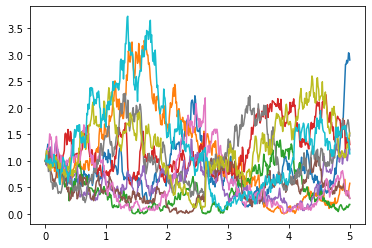

In [121]:
step_size=0.01
d = 10
T = 5.
x=0.
n=int(T/step_size)
#We create 100 paths of  brownian motion with discretization step 0.01 and up to time 0.25 starting at x
times = np.linspace(0., T, n)
times=times.reshape((n,1))
dt = times[1] - times[0]
# Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
B0 = x*np.ones(shape=(1, d))
B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
#Computing the SDE
Z=np.ones((n,d))
for i in range(1,n):
    for j in range(d):
        if((Z[i-1,j]+((1-Z[i-1,j])*dt)+(np.sqrt(Z[i-1,j])*dB[i-1,j]))>=0):
            Z[i,j]=(Z[i-1,j]+((1-Z[i-1,j])*dt)+(np.sqrt(Z[i-1,j])*dB[i-1,j]))
        else:
            Z[i:,j]=0
            break
#plotting
for i in range(d):
    plt.plot(times,Z[:,i])

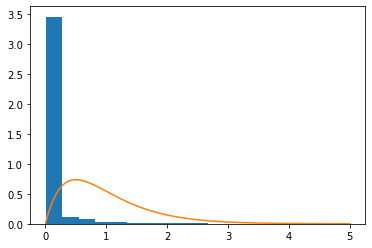

In [122]:
step_size=0.01
d = 1000
T = 5.
x=0.
n=int(T/step_size)
#We create 100 paths of  brownian motion with discretization step 0.01 and up to time 0.25 starting at x
times = np.linspace(0., T, n)
dt = times[1] - times[0]
# Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
B0 = x*np.ones(shape=(1, d))
B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
#Computing the SDE
Z=np.ones((n,d))
for i in range(1,n):
    for j in range(d):
        if((Z[i-1,j]+((1-Z[i-1,j])*dt)+(np.sqrt(Z[i-1,j])*dB[i-1,j]))>=0):
            Z[i,j]=(Z[i-1,j]+((1-Z[i-1,j])*dt)+(np.sqrt(Z[i-1,j])*dB[i-1,j]))
        else:
            Z[i:,j:]=0
            break
#Computing the f function
x=np.linspace(0.,5,1000)
f=4*x*np.exp(-2*x)
#Plotting
plt.hist(Z[n-1,:],density=True)
plt.plot(x,f)
plt.show()